In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('transaction.csv')
dataset

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland
...,...,...,...,...,...,...
10541,543911,21700,455,2/14/2011 12:46,17829,United Arab Emirates
10542,543911,22111,578,2/14/2011 12:46,17829,United Arab Emirates
10543,543911,22112,163,2/14/2011 12:46,17829,United Arab Emirates
10544,564428,23296,545,8/25/2011 11:27,17844,Canada


In [3]:
country = pd.DataFrame(dataset['Country'].value_counts())
country = country.sort_index()
country

,Country
Australia,356
Austria,88
Bahrain,3
Belgium,486
Brazil,8
Canada,36
Channel Islands,184
Cyprus,113
Czech Republic,4
Denmark,98


In [4]:
totalTransaction = pd.DataFrame(dataset['Country'].value_counts())
totalTransaction = totalTransaction.sort_index()
totalTransaction

,Country
Australia,356
Austria,88
Bahrain,3
Belgium,486
Brazil,8
Canada,36
Channel Islands,184
Cyprus,113
Czech Republic,4
Denmark,98


In [5]:
quantityEachCountry = pd.DataFrame(dataset.groupby(['Country'])['Qty'].sum())
quantityEachCountry

,Qty
Country,
Australia,177157
Austria,41043
Bahrain,1470
Belgium,254748
Brazil,4389
Canada,19349
Channel Islands,95964
Cyprus,56814
Czech Republic,2479


In [6]:
averageQuantity = quantityEachCountry.values / totalTransaction.values
averageQuantity

array([[497.63202247],
       [466.39772727],
       [490.        ],
       [524.17283951],
       [548.625     ],
       [537.47222222],
       [521.54347826],
       [502.77876106],
       [619.75      ],
       [554.48979592],
       [523.89259259],
       [553.        ],
       [533.34210526],
       [521.55381697],
       [518.35698546],
       [526.21212121],
       [560.17142857],
       [462.06557377],
       [519.83684211],
       [470.19565217],
       [567.2       ],
       [503.25      ],
       [501.13333333],
       [527.79652997],
       [548.17991632],
       [537.3125    ],
       [504.69754768],
       [469.71428571],
       [592.        ],
       [559.        ],
       [539.03525046],
       [516.33027523],
       [535.11981567],
       [531.34042553],
       [538.86956522],
       [486.29545455]])

In [7]:
quantityEachCountry['Qty'] = averageQuantity
quantityEachCountry

,Qty
Country,
Australia,497.632022
Austria,466.397727
Bahrain,490.000000
Belgium,524.172840
Brazil,548.625000
Canada,537.472222
Channel Islands,521.543478
Cyprus,502.778761
Czech Republic,619.750000


In [8]:
from sklearn.cluster import KMeans

In [9]:
cluster_i = []
cluster_val = []

for i in range(10):
    clustering = KMeans(n_clusters = 3, init = 'random', n_init = 1, max_iter = 5).fit(quantityEachCountry)
    cluster_i.append(clustering)
    cluster_val.append(clustering.inertia_)
    print(clustering, clustering.inertia_)


KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8257.151454676508
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8257.151454676508
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8257.151454676508
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8375.003940802037
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 9849.347473638736
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8257.151454676508
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8053.464374542196
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8257.151454676508
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8627.81933319931
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8053.464374542196


In [10]:
indexCluster = cluster_val.index(min(cluster_val))
clusterOfMinVal = cluster_i[indexCluster]

print(clusterOfMinVal, clusterOfMinVal.inertia_)

KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8053.464374542196


In [11]:
centroid = clusterOfMinVal.cluster_centers_
centroid

array([[486.74185073],
       [605.875     ],
       [536.64580463]])

In [12]:
sortedIndex = np.argsort(centroid.sum(axis=1))
zeroArray = np.zeros_like(sortedIndex)
zeroArray[sortedIndex] = np.arange(3)

sortedCentroid =centroid[zeroArray]
sortedCentroid

array([[486.74185073],
       [536.64580463],
       [605.875     ]])

In [13]:
sortedLabel = zeroArray[clusterOfMinVal.labels_]
sortedLabel

array([0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [14]:
label_2 = (sortedLabel == 2).nonzero()
countryHigh = quantityEachCountry.index[label_2]
countryHigh

Index(['Czech Republic', 'Saudi Arabia'], dtype='object', name='Country')

In [15]:
label_1 = (sortedLabel == 1).nonzero()
countryMid = quantityEachCountry.index[label_1]
countryMid

Index(['Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Italy', 'Lebanon', 'Netherlands', 'Norway', 'Poland',
       'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA',
       'United Arab Emirates'],
      dtype='object', name='Country')

In [16]:
label_0 = (sortedLabel == 0).nonzero()
countryLow = quantityEachCountry.index[label_0]
countryLow

Index(['Australia', 'Austria', 'Bahrain', 'Cyprus', 'Israel', 'Japan',
       'Lithuania', 'Malta', 'Portugal', 'RSA', 'Unspecified'],
      dtype='object', name='Country')

In [17]:
import matplotlib.pyplot as plt

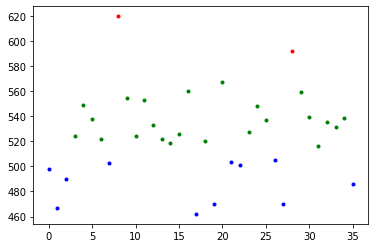

In [18]:
plt.plot(label_2, quantityEachCountry.iloc[label_2].to_numpy().reshape((1, -1)), 'r.')
plt.plot(label_1, quantityEachCountry.iloc[label_1].to_numpy().reshape((1, -1)), 'g.')
plt.plot(label_0, quantityEachCountry.iloc[label_0].to_numpy().reshape((1, -1)), 'b.')
plt.show()

In [19]:
np.array(dataset['Qty'])

array([830, 948, 695, ..., 163, 545, 643], dtype=int64)